**Normal Distributin**

非常常見的**連續**機率分布。常態分布在統計學上十分重要，因為分佈曲線長得像鍾型，又稱為鐘形曲線

<img src="pics/normal distribution.png" alt="normal distribution" style="width: 500px"/>

X服從一個平均數為μ
標準差為σ的常態分布，則記為：<img src="pics/eq1.svg" alt="eq1" style="width: 200px"/>

機率密度函數公式為：<img src="pics/eq2.svg" alt="eq2" style="width: 200px"/>

### 平均數 ：所有data value 加總除以資料總數

<img src="pics/mean.png" alt="mean" style="width: 500px"/>

### 變異數 ：所有中data value與平均數的差值平方加總後除以資料總數

<img src="pics/var.png" alt="var" style="width: 500px"/>

變異數在數學上的意義為資料分散程度，變異數越大，資料就越分散，反之

<img src="pics/normal-distribution-1.png" alt="std" style="width: 500px"/>

### 標準差：將變異數開根號，同樣用來表示資料分散程度，因為標準差跟原始資料的單位相同，比較直覺，所以比較泛用

--------------------

用numpy計算上面三種數值

In [1]:
import numpy as np

In [2]:
data = [2, 4, 12 , 5, 17, 3, 7, 8, 9, 7]

print("平均數為：", np.mean(data))
print("變異數為：", np.var(data))
print("標準差為：", np.std(data))

平均數為： 7.4
變異數為： 18.240000000000002
標準差為： 4.2708313008125245


numpy可以直接處理list資料，但是大量資料計算時建議轉成np.array

In [3]:
import random
# 隨機生成一百萬筆資料
data = [random.randint(2, 100) for _ in range(10000000)]

In [4]:
# dtype 為 list
print("平均數為：", np.mean(data))
print("變異數為：", np.var(data))
print("標準差為：", np.std(data))

平均數為： 50.9914678
變異數為： 816.7714712015631
標準差為： 28.579213971023822


In [5]:
# 轉換成array
data = np.array(data)

In [6]:
print("平均數為：", np.mean(data))
print("變異數為：", np.var(data))
print("標準差為：", np.std(data))

平均數為： 50.9914678
變異數為： 816.7714712015631
標準差為： 28.579213971023822


### 統計上對機率的定義
如果我們可以掌控世間所有的因素，那世界上就只有必然沒有偶然，但是現實中的問題無法掌控一切的因素，例如：真正在擲骰子時，因為骰子的品質而出現偏差，以致於機率上無法準確預測，這時候同常會多次擲骰子，藉由紀錄骰子點數出現的次數來算出機率，而透過這種計算才得出的機率，我們稱為 **機率統計**

當我們持續增加測量次數，從例子來看就是增加擲骰子的次數時．點數出現的可能性就會收斂在特定的數值．此時的數值就定義為**統計上的定義**

In [4]:
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
# 設置Seaborn風格
sns.set_style("darkgrid")

In [7]:

# 分別模擬擲骰子100次，1000次，10000次和100000次的結果
data1 = [random.randint(1, 6) for _ in range(100)]
data2 = [random.randint(1, 6) for _ in range(1000)]
data3 = [random.randint(1, 6) for _ in range(10000)]
data4 = [random.randint(1, 6) for _ in range(100000)]

In [14]:
counter1 = Counter(data1)
counter2 = Counter(data2)
counter3 = Counter(data3)
counter4 = Counter(data4)

注意：柱狀圖(bar)用於離散的資料(Ex:擲骰子)，直方圖(hist)用於連續性(Ex:血壓)的資料，如何判斷資料為離散或是連續，只要看他的平均有沒有意義即可。


今天擲骰子平均值為3.2，沒有意義，今天的血壓平均值為135mmHg，具有意義，則擲骰子結果為離散資料，血壓測量為連續資料

### subplots的運用

fig：代表整個繪圖的窗口（figure），即最外層的容器。這個窗口可以包含多個子圖（axes），你可以把它想像成畫布。fig 物件可以用來控制整個繪圖的屬性，例如設置標題、圖片大小、背景色等

axes：它代表子圖，也就是位於整個繪圖窗口（fig）中的一個個小區域。在這些子圖上，你可以進行具體的繪圖操作，例如繪製直條圖、折線圖等。axes 可以是一個二維的Numpy陣列，例如當 num_rows=2 和 num_cols=3 時，axes 將是一個形狀為 (2, 3) 的陣列

In [15]:
plt.rcParams['font.family'] = 'Taipei Sans TC Beta'

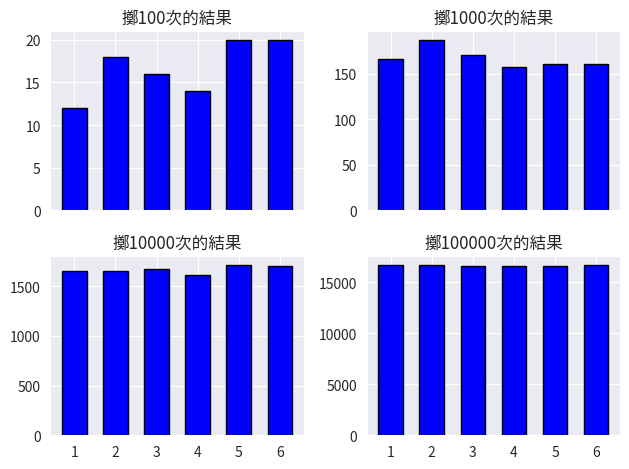

In [20]:
# 初始化子圖表，2,2代表2行2列
fig, axes = plt.subplots(2,2, sharex=True)

data_list = [counter1, counter2, counter3, counter4]

for i, ax in enumerate(axes.flat):
    
    data = data_list[i]
    x_values = data.keys()
    y_values = data.values()
    
    ax.bar(x_values, y_values, width=0.6, color='blue', edgecolor='black')

    ax.set_title(f'擲10'+"0"*(i+1)+"次的結果")

    x_ticks = [x for x in x_values]
    # 用於設置x軸的刻度位置, 希望在x軸上顯示的刻度位置
    ax.set_xticks(x_ticks)
    # 用於設置x軸的刻度文字, 希望在x軸上顯示的刻度標籤
    ax.set_xticklabels(x_ticks)
    
# 自動設定子圖之間的距離
plt.tight_layout()
plt.show()

最後的擲骰子的結果，每個點數出現的機率收斂到1/6。

### 大數法則

樣本數量越多，則其算術平均值就有越高的機率接近期望值

p.s.常態分佈的期望值等於平均值

### 中央極限定理

定義解釋：在許多情況下，對於獨立並同樣分布的隨機變數，即使原始變數本身不是常態分布，標準化樣本均值的抽樣分布也趨向於標準常態分布

白話解釋：從任何母體隨機抽取大量獨立的隨機變數，其平均值會趨近於常態分佈


### 為何常態分佈重要

原因有下面幾點:
1. 中央極限定理指出，當從獨立且相同分佈的隨機變量中取樣時，其樣本的平均分佈將趨向於常態分佈，即使原始分佈不是常態分佈。
2. 在機器學習中，我們經常需要進行假設檢驗、參數估計等統計分析。常態分佈的標準性質使得它在這些統計推斷中很受歡迎
3. 有些損失函數(loss function)的設計假設data的殘差服是從常態分佈的(MSE, 貝氏定理)
4. 有些模型(Ex: SVM, 高斯模型)預設data服從常態分佈，因為推導和求解更加容易

In [21]:
# 擲骰子函式

def rolling_dice(dice_num, times, mode ="mean"):
    assert mode=="mean" or mode=="sum", "請在mean和sum中選擇一個"
    result = []
    # 重複投擲dice_num顆骰子，次數為times
    for t in range(times):
        # 投擲dice_num顆骰子
        dice = [random.randint(1, 6) for _ in range(dice_num)]
        # 計算本次投擲dice_num顆骰子的平均
        if mode=="mean":
            val = np.mean(dice)
        else:
            val = np.sum(dice)

        result.append(val)
        
    return result
    

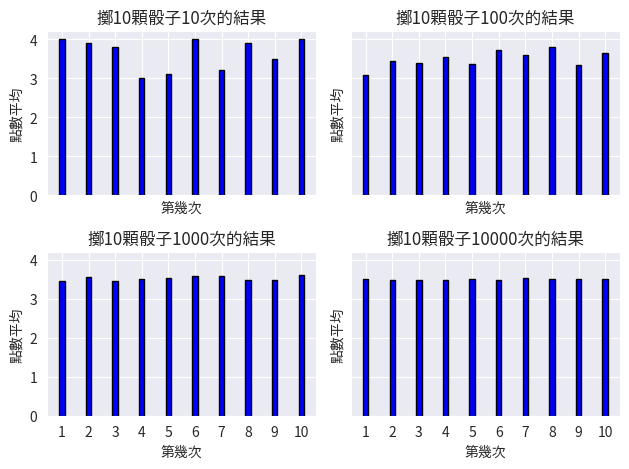

In [122]:
data_list = [
    #  投擲10顆骰子10次
    rolling_dice(10, 10, mode="mean"),
    #  投擲100顆骰子10次
    rolling_dice(100, 10, mode="mean"),
    #  投擲1000顆骰子10次
    rolling_dice(1000, 10, mode="mean"),
    #  投擲10000顆骰子10次
    rolling_dice(10000, 10, mode="mean")
] 

fig, axes = plt.subplots(2,2, sharex=True, sharey=True)

for i, ax in enumerate(axes.flat):
    data = data_list[i]
    x_values = range(1, 11)
    y_values = data

    
    ax.bar(x_values, y_values, width=0.2, color='blue', edgecolor='black')
    # 用於設置x軸的刻度位置, 希望在x軸上顯示的刻度位置
    ax.set_xticks(range(1, 11))
    # 用於設置x軸的刻度文字, 希望在x軸上顯示的刻度標籤
    ax.set_xticklabels(range(1, 11))
    ax.set_xlabel('第幾次')
    ax.set_ylabel('點數平均')
    ax.set_title("擲10顆骰子10"+"0"*i+"次的結果")


plt.tight_layout()
plt.show()

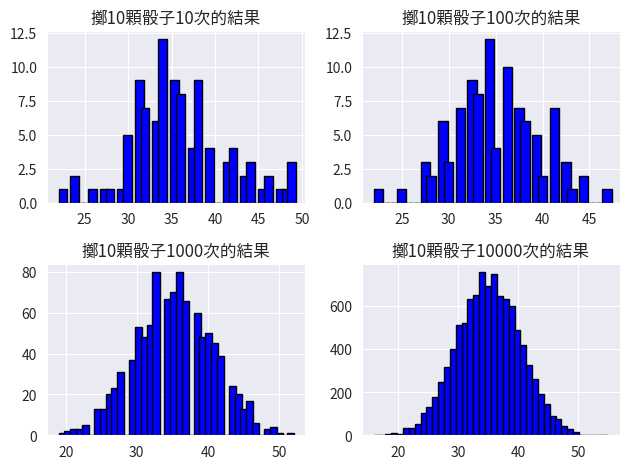

In [29]:
# 驗證中央極限定理
data_list = [
    #  投擲10顆骰子10次
    rolling_dice(10, 100, mode="sum"),
    #  投擲10顆骰子100次
    rolling_dice(10, 100, mode="sum"),
    #  投擲10顆骰子1000次
    rolling_dice(10, 1000, mode="sum"),
    #  投擲10顆骰子10000次
    rolling_dice(10, 10000, mode="sum")
] 


fig, axes = plt.subplots(2,2)

for i, ax in enumerate(axes.flat):
    data = data_list[i]
    
    ax.hist(data, bins=40, width=1.0, color='blue', edgecolor='black')

    ax.set_title("擲10顆骰子10"+"0"*i+"次的結果")

plt.tight_layout()
plt.show()

中央極限定理並不要求初始資料分佈型態，只要抽樣次數夠多，最終資料會趨近於常態分佈

以下為使用母體分佈不為常態分佈的驗證。


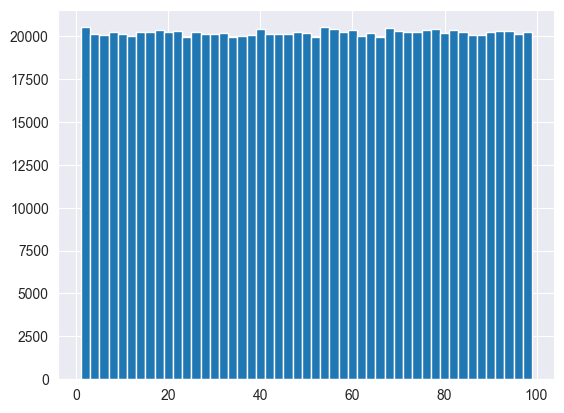

In [40]:
import random
data_num = 1000000
data = [random.uniform(1, 100) for _ in range(data_num)]

plt.hist(data, bins=range(1,100, 2))
plt.show()

如前面所述，每次抽樣的平均值，取的次數夠多則資料應該呈現常態分佈，那麼一次該抽樣多少筆資料？
假設一次抽樣n筆資料，抽樣m次才會出現中央極限定理。

n 最好≥ 30

m無一定值，越大越好

In [31]:
# 重複抽樣的次數
from tqdm import tqdm

n = 30
m = 1000

total_sample = []

data = set(data)

for i in tqdm(range(m)):
    
    # 進行一次抽樣
    sampled_data = random.sample(data, n)

    total_sample.append(np.mean(sampled_data))

    # print(f"Iteration {i + 1}: {sampled_data}")

    # 從總資料中移除已經抽取過的樣本，避免重複抽取
    data.difference_update(sampled_data)

  0%|          | 2/1000 [00:00<02:48,  5.92it/s]

100%|██████████| 1000/1000 [02:07<00:00,  7.87it/s]


In [47]:
# tricky
# 快速抽樣的方式

n = 30
m = 10000

random.shuffle(data)  # 將資料打亂

total_samples = []

for i in tqdm(range(m)):
    start_idx = i * n
    end_idx = (i + 1) * n
    sampled_data = data[start_idx:end_idx]
    total_samples.extend(sampled_data)

100%|██████████| 10000/10000 [00:00<00:00, 374010.56it/s]


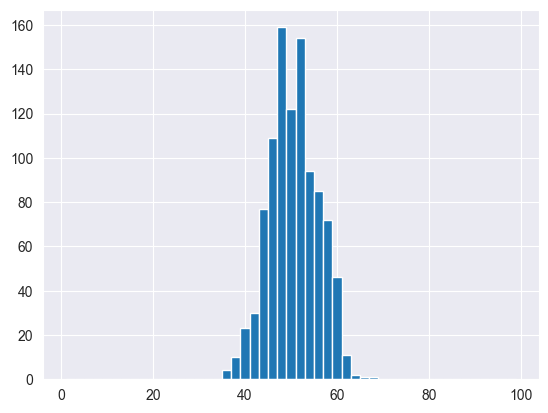

In [48]:
plt.hist(total_sample, bins=range(1,100, 2))
plt.show()

### 總結

在很多情況下，我們往往無法得到全體母體資料，例如全美大學生的生活費，很難去調查美國每一間大學的每一位大學生，我們也無法得知母體的平均值，大數定律告訴我們當樣本數量越多的時候樣本的均值就越接近總體的均值，在中央極限定理中，要求每次至少要有30個 因為只有當我們抽樣的數量夠多，我們用這些樣本計算出來的均值，才能夠幫助我們去合理的推斷總體的均值。

### bin 參數解釋

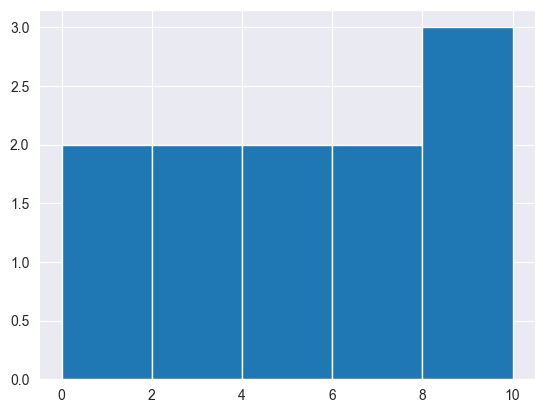

In [49]:
data = [1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# bin為序列，直方圖的每個柱子寬度和位置將根據該序列來決定
plt.hist(data, bins=[0, 2, 4, 6, 8, 10])
plt.show()

bins=[0, 2, 4, 6, 8, 10]代表：0到2一個區間，2到4一個區間...。

data = [1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]，檢視資料落在各個區間的數量，0-2之間的只有1, 1有兩個，因此為2。依此類推。

## 資料誤差

模型預測出的結果，我們稱為預測值，要對答案的原始資料我們稱為實際值，預測值和實際值通常都會有誤差，而這些誤差來自於三個部分：
1. 模型不夠好
2. 考量的變數太少或不正確，例如要預測身高，給模型的訓練資料卻是姓名
3. 測量或觀測時的誤差，又稱**隨機誤差**

模型不夠好，考量變數不正確，這兩個變因可以在後期修正，一個好的模型預測結果應該要符合

減少1. 2.的帶來的影響，並承認3.的存在

同時，在取樣時就盡量減少3.的影響，我們往往會用大量抽樣來減少3.影響，舉個例子

有n個人幫小明量身高，但由於測量時間不同，測量的人不同，測量的機器不同，因此測量出的數值出現了微妙的變化

μ為小明實際的身高，e1, e2...分別為測量時產生的隨機誤差。

<img src="pics/error distribution.png" alt="error" style="width: 500px"/>

<img src="pics/error distribution2.png" alt="error2" style="width: 700px"/>

但是從數學上來看，要將隨機誤差的標準差降為1/10,抽樣的資料要是現在的100倍，通常很難做到，因此在進入模型前會用一些方法試圖降低隨機誤差的影響，之後會再詳細介紹。